# [10주차] - Implementaion of Deep Learning(1)

## 1. Introduction

- Handwritten digit recognition
    - zip codes를 자동으로 인식하는 모델에 대한 필요성
    - 1990년대에 LeCun이 이미 Neural Network를 통해 이러한 recognition tasks를 구현하였음

## 2. Design Procedure

1. 입력과 출력 레이어를 설정 (Set input and Output layers)
    - hidden layer와 node의 수 또한 설정할 수 있음
    1. 입력 노드의 수는 입력 이미지 크기에 따라 결정
        - ex) 28x28 픽셀 크기 이미지 -> 784 노드(Input Layer)
    2. 출력 노드의 수는 인식하고자 하는 목표 개체 수에 따라 결정
        - ex) 0~9까지 숫자를 인식하고자 하기 때문에 총 10개의 출력 노드가 필요(Output Layer)
<br>
2. Hidden layers 설정
    - 두 가지 파라미터 : Layer의 수, Node의 수
    - 네트워크를 설계하기 위해 고려해야 할 사항:
    1. Hidden Layer의 수 증가
        1. Abstraction 효과
            - ReLU와 같은 Activation Function 사용 시 Nonlinearity를 효과적으로 반영가능(Network에 따라 다를 수 있음)
        2. Loss Converge까지 소요되는 시간 증가
            - Layer의 수가 증가하기 때문
    2. Hidden Layer 내 노드의 수 증가
        - 학습 Capability 개선되지만, 가중치(Weight)도 같이 증가되어 모델의 용량이 증가됨
- 최적의(Optimal) 계층 및 노드 수를 한번에 도출하기는 매우 어려움
    - 따라서 Heuristic 한 Study를 통해 여러 Parameter를 Setting해보고 결과를 도출하며 비교,분석할 필요가 있음
<br>
3. Loss Function과 Optimizer 선정
    - 학습을 위한 Loss 함수 선택
        - Classification 문제의 경우 Soft max를 기반으로 한 Cross Entropy 널리 사용됨
        - Cross Entropy : $H(p,q) = -\sum\limits_{i}^{}{p(i)log(q(i))}$
            - 이때 두 확률 분포가 비슷할수록 Cross Entropy는 0에 가까워짐
            - ex)
    - Loss를 최소화하는 최적의 가중치를 찾기 위한 Optimizer
        - Solution으로 Gradient Descent를 채택
        - Pytorch에서 제공하는 다양한 관련 함수를 통해 손쉽게 구현 가능
            - torch.optim.Adam(...) : 가장 널리 사용되는 함수, SGD + momentum + RMSprop을 모두 포함
                1. SGD(Stochastic Gradient Descent) : Momentum을 이용하여 Local Minima 극복
                2. Adagrad : Learning Rate을 Step 마다 줄여 빠르고 정확한 수렴이 가능하게 함
                3. RMSprop : 최적의 답에 도달하기 전에 0에 수렴하는 경우 방지

## 3. Implementation

In [6]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists(): # Data 이미 있으면 download (x)
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

This dataset is in numpy array format, and has been stored using pickle,
a python-specific format for serializing data.



In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

Each image is 28 x 28, and is being stored as a flattened row of length
784 (=28x28). Let's take a look at one; we need to reshape it to 2d
first.



(50000, 784)


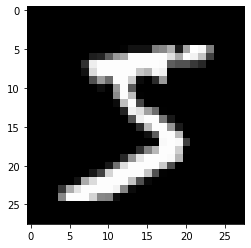

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

PyTorch uses ``torch.tensor``, rather than numpy arrays, so we need to
convert our data.



train과 validation을 tensor로 만드는 작업

In [5]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)
